#     Full parameter SCAN RTS3

#### final plot, arXiv 169501129
#### --> update LUX data, tmp. 1607

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
pwd

u'/home/fp/Projects/RST3/Notebooks_FinalFigs'

#### old comments, not really settled

#### we have values of MHC down to 70 GeV. 
#### the sigmav. should be using Sphd to bbar. check.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
#from numpy import matrix                                                                                                                                                                                          
import pylab
import cmath
import math
import commands
import sys
import scipy as sp
import scipy.integrate as integrate
import datetime
print datetime.datetime.now()

2016-07-29 16:18:31.029045


### $h \to \gamma \gamma$ in the IDM, taken from Arxiv:1212.4100

In [8]:
# SM constants                                                                                                                                                                                                                                                                 
vev=246.0                # GeV
alphaem=1.0/128.         # Dimensionless  
Gf=1.166e-5              # GeV^{-2}
ME=0.000511              # GeV
MU=0.1057                # GeV
MT=1.777                 # GeV
MW=80.38  # GeV
###Mw = 81.36;
MZ=91.18                 # GeV
WH=4.21e-3               # In GeV  Is this a theoretical value? Or the one which has been measured by the LHC collaborations?
mh = 125.1               # GeV
#mh = 125.09               # GeV
#mtop = 173.0
mtop = 170.9;

MH0 =60.0
MA0=700.0
MHC=700.0
Lambda_L=0.058
mu2sq=MH0**2 - Lambda_L*vev**2     # this is actually mu2 in z.
mu2 = sqrt(mu2sq)                  # sqrt of mu2

BRinvmax=0.13
BRinvprj=WH/(1+WH)
BRinvhwmax=0.75   #for gammahiggsmax = 4 gamma_SM
BRinvcut=0.996  #for gammahiggs approx 1GeV
MH0thresh=mh*0.5

BRSMhgaga=.0023007

###fp: https://twiki.cern.ch/twiki/bin/view/LHCPhysics/HiggsEuropeanStrategy2012 -> 0.00228 but we should use same order approx.

muhmingaga=0.66  #htogaga 2sigma bound from CMS ~ ATLAS
muhmaxgaga=1.69  #htogaga 2sigma bound from CMS ~ ATLAS

muhmintest=0.975 #htogaga test


In [17]:
# http://arxiv.org/pdf/1502.01589.pdf, table 3:
# Planck TT+lowP  0.1197 ± 0.0022
# Planck TT,TE,EE+lowP 0.1198 ± 0.0015

from indirectdirect import *
Omegadm = 0.1197  # Central value of the DM relic density
SigmaOmegadm = 0.0022 # One sigma deviation from the central value
Omerr= 2   # e sigmas CL
Omegadmmax = Omegadm + Omerr * SigmaOmegadm
Omegadmmin = Omegadm - Omerr * SigmaOmegadm

In [18]:
from IPython.display import display, Math, Latex
import pandas as pd
import os, sys, inspect
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble']=plt.rcParams['text.latex.preamble']+\
                                    [r"\usepackage{siunitx}",\
                                     r"\usepackage{amsmath}",\
                                     r"\usepackage{amssymb}",\
                                     r"\usepackage{cancel}",\
                                     r"\usepackage{slashed}"]
plt.rcParams['font.family']='serif'
plt.rcParams['font.serif']=['serif','Times New Roman','Times']

In [14]:
columns3=['Omega' ,'Xf' ,'sigmav' ,\
'sigmav_%bbar' ,'Width_h' ,'Brh_inv_H0H0' , \
'Brh_inv_A0A0' ,'Width_HP' ,'Width_AO' ,\
'PSI' ,'NSI' ,'Brh_gluon_gluon' ,\
'Brh_gamma_gamma' ,\
'MH0' ,'MA0' ,'MH1' ,'MH' ,\
'la2' ,'laL' ,\
'la1' ,'la2' ,'la3' ,'la4' ,\
'la5' ,'mu2' ,'e1' ,'e2' ,'e3' ,'e4' ,\
'e5' ,'e6' ,'e7' ,'e8' ,'e9' , \
'e10' ,'e11' ,'e12' ,'S' ,'T' ,'U' ,'fcl3' ,\
'Gamma1_th' ,'Gamma2_th' ,'BRinv_th' ,'sigmav_2012_f', 'sigmaSI_f',\
'sigmav_2015_f']

In [8]:
####%%writefile indirectdirect.py
####import numpy as np
def sigmav_fit(x):
    ''' Experimental annihilation cross section, lower limit taken
    from b bbar as a function of the dark matter mass, dawarf galaxies 
    Fermi limit 2014 http://arxiv.org/pdf/1503.02641.pdf
    '''
    a = -61.0275315866
    b = 0.231740700807
    c = 0.0695392085778
    g1=np.exp(a + b*np.log(x) + c*np.log(x)**2)
    return g1  

def LUXconstraint_official(x):
    '''Evaluate LUX limits for DD [arXiv: astro-ph.CO/1310.8214 ]'''
    m = np.array([7.89119649, 10., 12., 17., 30., 200., 450., 1000., 2000., 3500., 5000.])
    A = np.array([0.00000000e+00, 8.48911168e-41, 1.95004609e-42, 3.75121862e-44, 3.28089421e-45, 5.80846495e-46, 1.39568112e-45, 3.05245738e-45, 5.63013735e-45, 1.07867168e-44, 1.93910180e-44])
    B = np.array([0.00000000e+00, -9.02408269e-01, -5.20772861e-01, -1.90971186e-01, -5.03032503e-02, 7.66657692e-03, 3.11852240e-03, 1.34049663e-03, 7.28957975e-04, 3.94487035e-04, 2.23523977e-04])
    imax=10
    for i in range(1,imax+1):
        if x>=m[i-1] and x<=m[i]:
            limit = A[i]*np.exp(B[i]*x)
        if x<m[0] or x>m[imax]:
            limit = 0.0	
            print 'ERROR: Out of range'
    return limit*1E36

def sigmaSI_f2(x):
    import numpy as np
    x=np.asarray(x)
    if not x.shape: 
        x=[x] 
    
    return map(LUXconstraint_official,x)

In [19]:
# $h \to \gamma\gamma $

def of(x,y):
    if ((x/y) >= 1.0):
        of=math.asin(1.0/sqrt(x/y))**2
    elif ((x/y) <= 1.0):
        of= -(1.0/4.0)*(log((1.0+sqrt(1.0-(x/y)))/(1.0-sqrt(1.0-(x/y)) )) -1j*pi )**2
    return of

def oA(x,y):
        oA =  2.0*(x/y)*(1.0 + (1.0- (x/y))*of(x,y))
        return oA
        
def oB(x,y):
       oB =  -(2.0 + 3*(x/y) +3*(x/y)*(2.0-(x/y))*of(x,y)) 
       return oB       
    
def oC(x,y):
       oC =  -(x/y)*(1.0-(x/y)*of(x,y)) 
       return oC  

def oGammaSM(mtop,mh,MW):
        oGammaSM =  Gf*alphaem**2*mh**3/(128*sqrt(2)*pi**3)*\
        (abs(\
             (4.0/3.0)*oA(4*mtop**2,mh**2) + oB(4*MW**2,mh**2) ))**2
        return oGammaSM


def oGammaIDM(mtop,mh,MW):
        oGammaIDM =  Gf*alphaem**2*mh**3/(128*sqrt(2)*pi**3)*\
        (abs(\
             (4.0/3.0)*oA(4*mtop**2,mh**2) + oB(4*MW**2,mh**2) +\
             ((MHC**2 - mu2**2)/(MHC**2))*oC(4*MHC**2,mh**2) ))**2
        return oGammaIDM

def oGammaIDMb(mtop,mh,MW,MHC,mu2):
        oGammaIDMb =  Gf*alphaem**2*mh**3/(128*sqrt(2)*pi**3)*\
        (abs(\
             (4.0/3.0)*oA(4*mtop**2,mh**2) + oB(4*MW**2,mh**2) +\
             ((MHC**2 - mu2**2)/(MHC**2))*oC(4*MHC**2,mh**2) ))**2
        return oGammaIDMb
    
oGgagaSM=oGammaSM(mtop,mh,MW)

def oGgagaIDM(MHC,mu2):
    oGgagaIDM = oGammaIDMb(mtop,mh,MW,MHC,mu2)
    return oGgagaIDM

def oRgaga(MHC,mu2):
    oRgaga = oGgagaIDM(MHC,mu2)/oGgagaSM
    return oRgaga

def oRgaga2(MHC,MH0,laL):
    mu2sq=MH0**2-laL*vev**2
    oRgaga2 = oGgagaIDM(MHC, np.sqrt(mu2sq) )/oGgagaSM
    return oRgaga2


In [10]:
# $h \to \gamma\gamma $
# implemented again!

def r(x,y):
    r=4*x**2/y**2
    return r

def f(x,y):
    if ((2*x/y) >= 1.0):
        f=math.asin(1.0/sqrt( r(x,y) ))**2
    elif ((2*x/y) <= 1.0):
        f= -(1.0/4.0)*( log( (1.0+sqrt(1.0-r(x,y)))/(1.0-sqrt(1.0-r(x,y)) )) -1j*pi )**2
    return f

def A12(x,y):
        A12 =  2.0*r(x,y)*(1.0 + (1.0- r(x,y))*f(x,y))
        return A12
        
def A1(x,y):
       A1 =  -(2.0 + 3*r(x,y) + 3*r(x,y)*(2.0-r(x,y))*f(x,y)) 
       return A1       
    
def A0(x,y):
       A0 =  -r(x,y)*(1.0-r(x,y)*f(x,y)) 
       return A0  

def GammaSM(mtop,mh,MW):
        GammaSM =  Gf*alphaem**2*mh**3/(128*sqrt(2)*pi**3)*\
        (abs(\
             (4.0/3.0)*A12(mtop,mh) + A1(MW,mh) )\
        )**2
        return GammaSM


def GammaIDM(mtop,mh,MW,MHC,mu2):
        GammaIDM =  Gf*alphaem**2*mh**3/(128*sqrt(2)*pi**3)*\
        (abs(\
             (4.0/3.0)*A12(mtop,mh) +\
             A1(MW,mh) +\
             ((MHC**2 - mu2)/(MHC**2))*A0(MHC,mh) ))**2
        return GammaIDM

    
GgagaSM=GammaSM(mtop,mh,MW)

def GgagaIDMb(MHC,mu2):
    GgagaIDMb = GammaIDM(mtop,mh,MW,MHC,mu2)
    return GgagaIDMb

def Rgaga(MHC,mu2):
    Rgaga = GgagaIDMb(MHC,mu2)/GgagaSM
    return Rgaga

def Rgaga2(MHC,MH0,laL):
    mu2sq=MH0**2-laL*vev**2
    Rgaga2 = GgagaIDMb(MHC, mu2sq )/GgagaSM
    return Rgaga2


In [20]:
# $h \to \gamma\gamma $
# implement again!

def r(x,y):
    r=4*x**2/y**2
    return r

## only for 2x>y
def fb(x,y):
    fb=math.asin(1.0/sqrt( r(x,y) ))**2
    return fb


def A12(x,y):
        A12 =  2.0*r(x,y)*(1.0 + (1.0- r(x,y))*fb(x,y))
        return A12
        
def A1(x,y):
       A1 =  -(2.0 + 3*r(x,y) + 3*r(x,y)*(2.0-r(x,y))*fb(x,y)) 
       return A1       
    
def A0(x,y):
       A0 =  -r(x,y)*(1.0-r(x,y)*fb(x,y)) 
       return A0  

def GammaSM(mtop,mh,MW):
        GammaSM =  Gf*alphaem**2*mh**3/(128*sqrt(2)*pi**3)*\
        (abs(\
             (4.0/3.0)*A12(mtop,mh) + A1(MW,mh) )\
        )**2
        return GammaSM


def GammaIDM(mtop,mh,MW,MHC,mu2):
        GammaIDM =  Gf*alphaem**2*mh**3/(128*sqrt(2)*pi**3)*\
        (abs(\
             (4.0/3.0)*A12(mtop,mh) +\
             A1(MW,mh) +\
             ((MHC**2 - mu2)/(MHC**2))*A0(MHC,mh) ))**2
        return GammaIDM

    
GgagaSM=GammaSM(mtop,mh,MW)

def GgagaIDMb(MHC,mu2):
    GgagaIDMb = GammaIDM(mtop,mh,MW,MHC,mu2)
    return GgagaIDMb

def Rgaga(MHC,mu2):
    Rgaga = GgagaIDMb(MHC,mu2)/GgagaSM
    return Rgaga

def Rgaga2(MHC,MH0,laL):
    mu2sq=MH0**2-laL*vev**2
    Rgaga2 = GgagaIDMb(MHC, mu2sq )/GgagaSM
    return Rgaga2


In [ ]:
c3=np.loadtxt('data_IDM/data_IDM.txt')

In [15]:
## need to delete wrong entry! correct dataset...

cdtemp=pd.DataFrame(c3,columns=columns3)
#cd3=cdtemp[cdtemp['MH0']>cdtemp.MH0.min()]
cd3=cdtemp

cdtmp=cd3[cd3['Omega']==cd3.Omega.max()]

In [21]:
### rename. for some reason, I had to change the name to repeat this command.

cd3['sigmaSI_ff']=sigmaSI_f2(cd3.MH0)
cd3['sigmaSI_fD']=cd3['sigmaSI_ff']*Omegadm/cd3['Omega']

cd3['sigmaSI']=cd3['NSI']
cd3['sigmaSI_fN']=cd3['sigmaSI_fD']
cd3['sigmav_fN']=cd3['sigmav_2015_f']*Omegadm**2/cd3['Omega']**2
cd3['BRinvIDM']=cd3['Brh_inv_A0A0'] +cd3['Brh_inv_H0H0']

cd3R = cd3[cd3['Omega']<=Omegadmmax]
cd30R = cd3[cd3['Omega']>=Omegadmmax]

NameError: name 'sigmaSI_f2' is not defined

In [22]:
### changing defs
### c0D : c30DD
### c0I: c30ID
### cI0D : c3ID0DD
### c3DD0ID
### c30IDDD
### c3DD
### c3ID
### c3IDDD
### c3IDDDinv : cIDh
### c3AcoIDDDinv : cAcoIDh
### c3CcoIDDDinv
### c30coIDDDinv
### c3IDDD0R : cID0R
### c30inv : c0h
### c3dR : cd3R, cd30R

### need sigmaSI,sigmaSI_fN,etc.fN ,c3dR,cd3.Brh_inv_A0A0 +cd3.Brh_inv_H0H0
### fNN -> fN

c0I  = cd3[(cd3['sigmav']  > cd3['sigmav_fN'])]    
c0D  = cd3[(cd3['sigmaSI'] > cd3['sigmaSI_fN'])] 
c0ID = c0D[(c0D['sigmav']  > c0D['sigmav_fN'])]

cI0D = cd3[np.logical_and( cd3['sigmaSI'] > (cd3['sigmaSI_fN']),  \
                           cd3['sigmav']  < (cd3['sigmav_fN']) \
                           )] # Points not satisfiying Direct Detection experiment. No scaling
cD0I = cd3[np.logical_and( cd3['sigmav']  > (cd3['sigmav_fN']), \
                           cd3['sigmaSI'] < (cd3['sigmaSI_fN']) \
                           )]    # Points not satisfiying Indirect Detection experiment. scaling

cI  = cd3R[(cd3R['sigmav']  < (cd3R['sigmav_fN']))]    
cD  = cd3R[(cd3R['sigmaSI'] < (cd3R['sigmaSI_fN']))] 
cID = cD[   cD['sigmav']    < (cD['sigmav_fN']) ]
cIDhinv = cID[( cID.BRinvIDM ) <BRinvmax]
cIDh = cIDhinv[np.logical_and(\
                              ( cIDhinv.Brh_gamma_gamma ) > BRSMhgaga*muhmingaga, \
                              ( cIDhinv.Brh_gamma_gamma ) < BRSMhgaga*muhmaxgaga) ]

cIDh0ga = cIDhinv[np.logical_or(\
                              ( cIDhinv.Brh_gamma_gamma ) < BRSMhgaga*muhmingaga, \
                              ( cIDhinv.Brh_gamma_gamma ) > BRSMhgaga*muhmaxgaga) ]

### test
cIDhtst = cIDhinv[np.logical_and(\
                              ( cIDhinv.Brh_gamma_gamma ) > BRSMhgaga*muhmintest, \
                              ( cIDhinv.Brh_gamma_gamma ) < BRSMhgaga*muhmaxgaga) ]
cIDh0gatst = cIDhinv[np.logical_or(\
                              ( cIDhinv.Brh_gamma_gamma ) < BRSMhgaga*muhmintest, \
                              ( cIDhinv.Brh_gamma_gamma ) > BRSMhgaga*muhmaxgaga) ]


cAcoIDh = cIDh[np.abs( cIDh['MA0']-cIDh['MH0']<8 )]
cCcoIDh = cIDh[np.abs( cIDh['MH1']-cIDh['MH0']<12 )]
c0coIDh = cIDh[np.logical_and( \
                              np.abs( cIDh['MA0']-cIDh['MH0'] )>=8, \
                              np.abs( cIDh['MH1']-cIDh['MH0'] )>=12 )]
### change cco: use abs(diff) to avoid future bugs.

cID0R=cd3[ np.logical_and( cd3['Omega'] > Omegadmmax, \
                            np.logical_and(cd3['sigmaSI']< cd3['sigmaSI_fN'], \
                                           cd3['sigmav'] < cd3['sigmav_fN'] ) )]
c0R=cd3[ np.logical_and( cd3['Omega'] > Omegadmmax, \
                         cd3['Omega'] > Omegadmmax    )]

c0h=cd3[np.logical_and( cd3.BRinvIDM >BRinvmax, cd3.BRinvIDM >BRinvmax)]



KeyError: 'sigmav_fN'

In [ ]:
### !!! here, updated LUX14->LUX15

ncD  = cd3R[(cd3R['sigmaSI'] < (cd3R['sigmaSI_fN']/1.22))] 
ncID = ncD[   ncD['sigmav']    < (ncD['sigmav_fN']) ]
ncIDhinv = ncID[( ncID.BRinvIDM ) <BRinvmax]
ncIDh = ncIDhinv[np.logical_and(\
                              ( ncIDhinv.Brh_gamma_gamma ) > BRSMhgaga*muhmingaga, \
                              ( ncIDhinv.Brh_gamma_gamma ) < BRSMhgaga*muhmaxgaga) ]

ncIDh0ga = ncIDhinv[np.logical_or(\
                              ( ncIDhinv.Brh_gamma_gamma ) < BRSMhgaga*muhmingaga, \
                              ( ncIDhinv.Brh_gamma_gamma ) > BRSMhgaga*muhmaxgaga) ]

### test
ncIDhtst = ncIDhinv[np.logical_and(\
                              ( ncIDhinv.Brh_gamma_gamma ) > BRSMhgaga*muhmintest, \
                              ( ncIDhinv.Brh_gamma_gamma ) < BRSMhgaga*muhmaxgaga) ]
ncIDh0gatst = ncIDhinv[np.logical_or(\
                              ( ncIDhinv.Brh_gamma_gamma ) < BRSMhgaga*muhmintest, \
                              ( ncIDhinv.Brh_gamma_gamma ) > BRSMhgaga*muhmaxgaga) ]
ncAcoIDh = ncIDh[np.abs( ncIDh['MA0']-ncIDh['MH0']<8 )]
ncCcoIDh = ncIDh[np.abs( ncIDh['MH1']-ncIDh['MH0']<12 )]
nc0coIDh = ncIDh[np.logical_and( \
                              np.abs( ncIDh['MA0']-ncIDh['MH0'] )>=8, \
                              np.abs( ncIDh['MH1']-ncIDh['MH0'] )>=12 )]
### change cco: use abs(diff) to avoid future bugs.

ncID0R=cd3[ np.logical_and( cd3['Omega'] > Omegadmmax, \
                            np.logical_and(cd3['sigmaSI']< cd3['sigmaSI_fN']/1.22, \
                                           cd3['sigmav'] < cd3['sigmav_fN'] ) )]


In [ ]:
### !!! here, updated LUX14->LUX16
### assume sensitivity times 4. Its less than that for lower masses.
ncD  = cd3R[(cd3R['sigmaSI'] < (cd3R['sigmaSI_fN']/3.66))] 
ncID = ncD[   ncD['sigmav']    < (ncD['sigmav_fN']) ]
ncIDhinv = ncID[( ncID.BRinvIDM ) <BRinvmax]
ncIDh = ncIDhinv[np.logical_and(\
                              ( ncIDhinv.Brh_gamma_gamma ) > BRSMhgaga*muhmingaga, \
                              ( ncIDhinv.Brh_gamma_gamma ) < BRSMhgaga*muhmaxgaga) ]

ncIDh0ga = ncIDhinv[np.logical_or(\
                              ( ncIDhinv.Brh_gamma_gamma ) < BRSMhgaga*muhmingaga, \
                              ( ncIDhinv.Brh_gamma_gamma ) > BRSMhgaga*muhmaxgaga) ]

### test
ncIDhtst = ncIDhinv[np.logical_and(\
                              ( ncIDhinv.Brh_gamma_gamma ) > BRSMhgaga*muhmintest, \
                              ( ncIDhinv.Brh_gamma_gamma ) < BRSMhgaga*muhmaxgaga) ]
ncIDh0gatst = ncIDhinv[np.logical_or(\
                              ( ncIDhinv.Brh_gamma_gamma ) < BRSMhgaga*muhmintest, \
                              ( ncIDhinv.Brh_gamma_gamma ) > BRSMhgaga*muhmaxgaga) ]
ncAcoIDh = ncIDh[np.abs( ncIDh['MA0']-ncIDh['MH0']<8 )]
ncCcoIDh = ncIDh[np.abs( ncIDh['MH1']-ncIDh['MH0']<12 )]
nc0coIDh = ncIDh[np.logical_and( \
                              np.abs( ncIDh['MA0']-ncIDh['MH0'] )>=8, \
                              np.abs( ncIDh['MH1']-ncIDh['MH0'] )>=12 )]
### change cco: use abs(diff) to avoid future bugs.

ncID0R=cd3[ np.logical_and( cd3['Omega'] > Omegadmmax, \
                            np.logical_and(cd3['sigmaSI']< cd3['sigmaSI_fN']/3.66, \
                                           cd3['sigmav'] < cd3['sigmav_fN'] ) )]


In [ ]:
c4=np.loadtxt('data_IDM/DM_output1.txt')
cd4=pd.DataFrame(c4,columns=columns3)


cd4['sigmaSI_ff']=sigmaSI_f2(cd4.MH0)
###
cd4['sigmaSI_fD']=cd4['sigmaSI_ff']*Omegadm/cd4['Omega']
###

cd4['sigmaSI']=cd4['NSI']
###cd3['sigmaSI_fN']=cd3['sigmaSI_f']*Omegadm/cd3['Omega']
cd4['sigmaSI_fN']=cd4['sigmaSI_fD']
cd4['sigmav_fN']=cd4['sigmav_2015_f']*Omegadm**2/cd4['Omega']**2
cd4['BRinvIDM']=cd4['Brh_inv_A0A0'] +cd4['Brh_inv_H0H0']

cd4R = cd4[cd4['Omega']<=Omegadmmax]
cd40R = cd4[cd4['Omega']>=Omegadmmax]

xc0I  = cd4[(cd4['sigmav']  > cd4['sigmav_fN'])]    
xc0D  = cd4[(cd4['sigmaSI'] > cd4['sigmaSI_fN'])] 
xc0ID = xc0D[(xc0D['sigmav']  > xc0D['sigmav_fN'])]

xcI0D = cd4[np.logical_and( cd4['sigmaSI'] > (cd4['sigmaSI_fN']),  \
                           cd4['sigmav']  < (cd4['sigmav_fN']) \
                           )] # Points not satisfiying Direct Detection experiment. No scaling
xcD0I = cd4[np.logical_and( cd4['sigmav']  > (cd4['sigmav_fN']), \
                           cd4['sigmaSI'] < (cd4['sigmaSI_fN']) \
                           )]    # Points not satisfiying Indirect Detection experiment. scaling

xcI  = cd4R[(cd4R['sigmav']  < (cd4R['sigmav_fN']))]    
xcD  = cd4R[(cd4R['sigmaSI'] < (cd4R['sigmaSI_fN']))] 
xcID = xcD[   xcD['sigmav']    < (xcD['sigmav_fN']) ]
xcIDhinv = xcID[( xcID.BRinvIDM ) <BRinvmax]
xcIDh = xcIDhinv[np.logical_and(\
                              ( xcIDhinv.Brh_gamma_gamma ) > BRSMhgaga*muhmingaga, \
                              ( xcIDhinv.Brh_gamma_gamma ) < BRSMhgaga*muhmaxgaga) ]

xcIDh0ga = xcIDhinv[np.logical_or(\
                              ( xcIDhinv.Brh_gamma_gamma ) < BRSMhgaga*muhmingaga, \
                              ( xcIDhinv.Brh_gamma_gamma ) > BRSMhgaga*muhmaxgaga) ]


xcAcoIDh = xcIDh[np.abs( xcIDh['MA0']-xcIDh['MH0']<8 )]
xcCcoIDh = xcIDh[np.abs( xcIDh['MH1']-xcIDh['MH0']<12 )]
xc0coIDh = xcIDh[np.logical_and( \
                              np.abs( xcIDh['MA0']-xcIDh['MH0'] )>=8, \
                              np.abs( xcIDh['MH1']-xcIDh['MH0'] )>=12 )]

xcID0R=cd4[ np.logical_and( cd4['Omega'] > Omegadmmax, \
                            np.logical_and(cd4['sigmaSI']< cd4['sigmaSI_fN'], \
                                           cd4['sigmav'] < cd4['sigmav_fN'] ) )]
xc0R=cd4[ np.logical_and( cd4['Omega'] > Omegadmmax, \
                         cd4['Omega'] > Omegadmmax    )]

xc0h=cd4[np.logical_and( cd4.BRinvIDM >BRinvmax, cd4.BRinvIDM >BRinvmax)]


In [4]:
## to do, updated 1512 LUX
## run fig twice to see final aspect ratio.
#plt.semilogy(xcCcoIDh['MH0'],xcCcoIDh['Omega'],'g.',color='#f000f0',              markersize=12)


plt.semilogy(c0ID['MH0'],c0ID['Omega'],'y.',color='#ff6600', markersize=2.5,label= '')
plt.semilogy(cI0D['MH0'],cI0D['Omega'],'y.',color='#ffcc00', markersize=2.5,label= '')
plt.semilogy(cD0I['MH0'],cD0I['Omega'],'y.',color='#ff0000', markersize=2.5,label= '')
#
plt.semilogy(cIDh0ga['MH0'],cIDh0ga['Omega'],'y.',color='#aa0088', markersize=2.5,label= '')

plt.semilogy(c0R['MH0'],c0R['Omega'],'y.', color='#0070f0', markersize=2.5,label= '')

#LUX15
plt.semilogy(cCcoIDh['MH0'],cCcoIDh['Omega'],'g.',color='#ffcc00', markersize=5.5,label= '')
plt.semilogy(cAcoIDh['MH0'],cAcoIDh['Omega'],'g.',color='#ffcc00', markersize=5.5,label= '')
plt.semilogy(c0coIDh['MH0'],c0coIDh['Omega'],'g.',color='#ffcc00', markersize=5.5,label= '')

#plt.semilogy(cCcoIDh['MH0'],cCcoIDh['Omega'],'g.',color='#990dd0', markersize=8.5,label= '')
#plt.semilogy(cAcoIDh['MH0'],cAcoIDh['Omega'],'g.',color='#0030a0', markersize=8.5,label= '')
#plt.semilogy(c0coIDh['MH0'],c0coIDh['Omega'],'g.',color='#00c0d0', markersize=8.5,label= '')

#LUX1607
plt.semilogy(ncCcoIDh['MH0'],ncCcoIDh['Omega'],'g.',color='#99dd00', markersize=5.5,label= '')
plt.semilogy(ncAcoIDh['MH0'],ncAcoIDh['Omega'],'g.',color='#006000', markersize=5.5,label= '')
plt.semilogy(nc0coIDh['MH0'],nc0coIDh['Omega'],'g.',color='#00c000', markersize=5.5,label= '')

plt.semilogy(X,Y,'k-',lw=2,label=r'$ {\rm{LHC\ excluded }}\ (H\rightarrow {\rm inv.}) $')
plt.semilogy(Xlhc2b,Ylhc2b,'k--',lw=2)
plt.semilogy(Xilc,Yilc,'k:',lw=2)


plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#00c000', label= r'$ \rm{allowed} $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#99dd00', label= r'$ {\rm{allowed\ }} ({H^\pm}-{H^0}{\rm coannih.}) $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#006000', label= r'$ {\rm{allowed\ }} ({A^0}-{H^0}{\rm coannih.}) $', markersize=12)

plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#0070f0',\
             label= r'$ \rm{Planck\ excluded} $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#ffcc00',\
             label= r'$ \rm{LUX\ excluded}$', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#ff0000',\
             label= r' ${\rm Fermi-LAT\ excluded}$', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#aa0088',\
             label= r' ${h\to \gamma\gamma\rm \ excluded}$', markersize=12)

plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#ffffff',markersize=12,label= '')

plt.xlim(50,90)
plt.ylim(1E-7,1.E0)
plt.xlabel(r'$m_{H}^{0}$ [GeV]',size=13)
plt.ylabel(r'$\Omega_{\rm DM} h^{2}$',size=13)

plt.annotate('$\Omega_{\\rm DM}>\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=12, xy=(85, 0.15), xytext=(84, 0.15), color='black')
plt.annotate('$\Omega_{\\rm DM}<\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=12, xy=(85, 0.06), xytext=(84, 0.06), color='black')

plt.axhline(Omegadmmax, color = 'gray')
plt.axhline(Omegadmmin, color = 'gray') 
plt.legend(prop={'size':13},loc=(1.04,0))

plt.tight_layout(rect=(0,0,0.6,1))
    
figsize(12,6)
plt.axvline(MH0thresh,color = 'white',linewidth=1.2,linestyle='--') 

#plt.title('($|\lambda_L|>10^{-5}$), $<\sigma v>^{dSph} $',size=15)
###plt.savefig('OmegavsMH0_IDM_final_s16.pdf')
print datetime.datetime.now()

NameError: name 'plt' is not defined

2016-07-22 16:56:53.127771


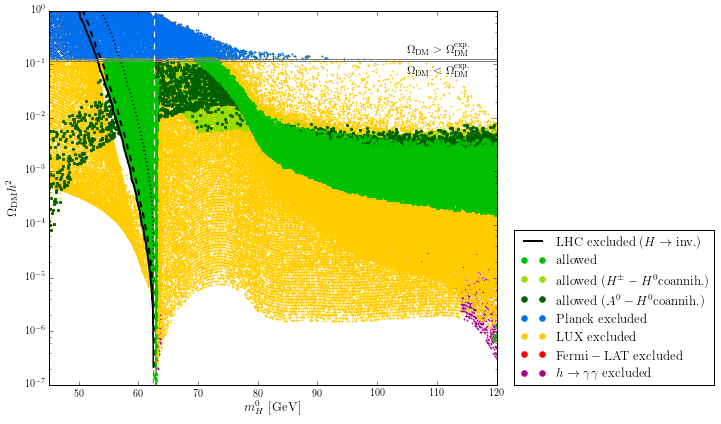

In [51]:
## to do, updated 1512 LUX
## run fig twice to see final aspect ratio.
#plt.semilogy(xcCcoIDh['MH0'],xcCcoIDh['Omega'],'g.',color='#f000f0',              markersize=12)


plt.semilogy(c0ID['MH0'],c0ID['Omega'],'y.',color='#ff6600', markersize=2.5,label= '')
plt.semilogy(cI0D['MH0'],cI0D['Omega'],'y.',color='#ffcc00', markersize=2.5,label= '')
plt.semilogy(cD0I['MH0'],cD0I['Omega'],'y.',color='#ff0000', markersize=2.5,label= '')
#
plt.semilogy(cIDh0ga['MH0'],cIDh0ga['Omega'],'y.',color='#aa0088', markersize=2.5,label= '')

plt.semilogy(c0R['MH0'],c0R['Omega'],'y.', color='#0070f0', markersize=2.5,label= '')

#LUX15
plt.semilogy(cCcoIDh['MH0'],cCcoIDh['Omega'],'g.',color='#ffcc00', markersize=5.5,label= '')
plt.semilogy(cAcoIDh['MH0'],cAcoIDh['Omega'],'g.',color='#ffcc00', markersize=5.5,label= '')
plt.semilogy(c0coIDh['MH0'],c0coIDh['Omega'],'g.',color='#ffcc00', markersize=5.5,label= '')

#plt.semilogy(cCcoIDh['MH0'],cCcoIDh['Omega'],'g.',color='#990dd0', markersize=8.5,label= '')
#plt.semilogy(cAcoIDh['MH0'],cAcoIDh['Omega'],'g.',color='#0030a0', markersize=8.5,label= '')
#plt.semilogy(c0coIDh['MH0'],c0coIDh['Omega'],'g.',color='#00c0d0', markersize=8.5,label= '')

#LUX1607
plt.semilogy(ncCcoIDh['MH0'],ncCcoIDh['Omega'],'g.',color='#99dd00', markersize=5.5,label= '')
plt.semilogy(ncAcoIDh['MH0'],ncAcoIDh['Omega'],'g.',color='#006000', markersize=5.5,label= '')
plt.semilogy(nc0coIDh['MH0'],nc0coIDh['Omega'],'g.',color='#00c000', markersize=5.5,label= '')

plt.semilogy(X,Y,'k-',lw=2,label=r'$ {\rm{LHC\ excluded }}\ (H\rightarrow {\rm inv.}) $')
plt.semilogy(Xlhc2b,Ylhc2b,'k--',lw=2)
plt.semilogy(Xilc,Yilc,'k:',lw=2)


plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#00c000', label= r'$ \rm{allowed} $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#99dd00', label= r'$ {\rm{allowed\ }} ({H^\pm}-{H^0}{\rm coannih.}) $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#006000', label= r'$ {\rm{allowed\ }} ({A^0}-{H^0}{\rm coannih.}) $', markersize=12)

plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#0070f0',\
             label= r'$ \rm{Planck\ excluded} $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#ffcc00',\
             label= r'$ \rm{LUX\ excluded}$', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#ff0000',\
             label= r' ${\rm Fermi-LAT\ excluded}$', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#aa0088',\
             label= r' ${h\to \gamma\gamma\rm \ excluded}$', markersize=12)

plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#ffffff',markersize=12,label= '')

plt.xlim(45,120)
plt.ylim(1E-7,1.E0)
plt.xlabel(r'$m_{H}^{0}$ [GeV]',size=13)
plt.ylabel(r'$\Omega_{\rm DM} h^{2}$',size=13)

plt.annotate('$\Omega_{\\rm DM}>\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=12, xy=(85, 0.15), xytext=(105, 0.15), color='black')
plt.annotate('$\Omega_{\\rm DM}<\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=12, xy=(85, 0.06), xytext=(105, 0.06), color='black')

plt.axhline(Omegadmmax, color = 'gray')
plt.axhline(Omegadmmin, color = 'gray') 
plt.legend(prop={'size':13},loc=(1.04,0))

plt.tight_layout(rect=(0,0,0.6,1))
    
figsize(12,6)
plt.axvline(MH0thresh,color = 'white',linewidth=1.2,linestyle='--') 

#plt.title('($|\lambda_L|>10^{-5}$), $<\sigma v>^{dSph} $',size=15)
###plt.savefig('OmegavsMH0_IDM_final_s16.pdf')
print datetime.datetime.now()

### Prepare invisible upper limit

In [17]:
#%%writefile pareto.py
def pareto_frontier(Xs, Ys, maxX = True, maxY = True):
# Sort the list in either ascending or descending order of X
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
# Start the Pareto frontier with the first value in the sorted list
    p_front = [myList[0]]    
# Loop through the sorted list
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]: # Look for higher values of Y
                p_front.append(pair) # and add them to the Pareto frontier
        else:
            if pair[1] <= p_front[-1][1]: # Look for lower values of Y
                p_front.append(pair) # and add them to the Pareto frontier
# Turn resulting pairs back into a list of Xs and Ys
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

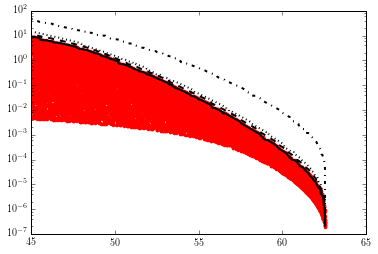

In [18]:
#filter "bad points"
c0hm=cd3[np.abs(cd3.laL)<0.5]
c0hm=c0hm[c0hm.MA0-c0hm.MH0>10]
#specific branchings:
lhc=c0hm[c0hm.BRinvIDM >0.13] 
X,Y=pareto_frontier(lhc.MH0.values,lhc.Omega.values)
#arXiv:1411.1335, page 12
lhc2=c0hm[c0hm.BRinvIDM >0.09]
Xlhc2,Ylhc2=pareto_frontier(lhc2.MH0.values,lhc2.Omega.values)
lhc2b=c0hm[c0hm.BRinvIDM >0.065]
Xlhc2b,Ylhc2b=pareto_frontier(lhc2b.MH0.values,lhc2b.Omega.values)
ilc=c0hm[c0hm.BRinvIDM >0.0026]
Xilc,Yilc=pareto_frontier(ilc.MH0.values,ilc.Omega.values)
plt.semilogy(lhc['MH0'],lhc['Omega'],'r.')
plt.semilogy(X,Y,'k-',lw=2)
plt.semilogy(Xlhc2,Ylhc2,'k--',lw=2)
plt.semilogy(Xlhc2b,Ylhc2b,'k:',lw=2)

plt.semilogy(Xilc,Yilc,'k-.',lw=2)

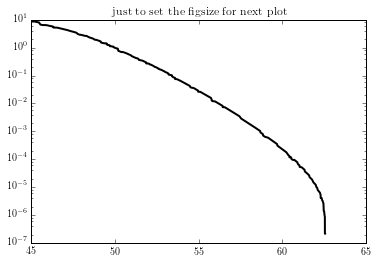

In [19]:
#filter "bad points"
plt.semilogy(X,Y,'k-',lw=2)
plt.title("just to set the figsize for next plot")
figsize(8,6)


In [ ]:
### c0ID, cI0D, cD0I, cIDh0ga, c0R, cCcoIDh, cAcoIDh, c0coIDh, ncCcoIDh, ncAcoIDh, nc0coIDh

2016-07-22 16:09:13.082296


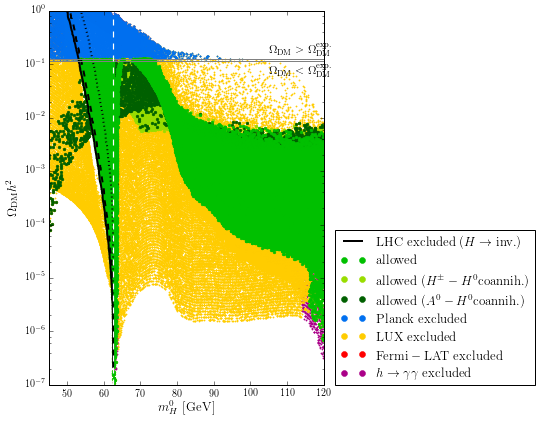

In [20]:
## to do, updated 1512 LUX
## run fig twice to see final aspect ratio.

plt.semilogy(c0ID['MH0'],c0ID['Omega'],'y.',color='#ff6600', markersize=2.5,label= '')
plt.semilogy(cI0D['MH0'],cI0D['Omega'],'y.',color='#ffcc00', markersize=2.5,label= '')
plt.semilogy(cD0I['MH0'],cD0I['Omega'],'y.',color='#ff0000', markersize=2.5,label= '')
#
plt.semilogy(cIDh0ga['MH0'],cIDh0ga['Omega'],'y.',color='#aa0088', markersize=2.5,label= '')

plt.semilogy(c0R['MH0'],c0R['Omega'],'y.', color='#0070f0', markersize=2.5,label= '')

#LUX15
plt.semilogy(cCcoIDh['MH0'],cCcoIDh['Omega'],'g.',color='#ffcc00', markersize=5.5,label= '')
plt.semilogy(cAcoIDh['MH0'],cAcoIDh['Omega'],'g.',color='#ffcc00', markersize=5.5,label= '')
plt.semilogy(c0coIDh['MH0'],c0coIDh['Omega'],'g.',color='#ffcc00', markersize=5.5,label= '')

#LUX16
plt.semilogy(ncCcoIDh['MH0'],ncCcoIDh['Omega'],'g.',color='#99dd00', markersize=5.5,label= '')
plt.semilogy(ncAcoIDh['MH0'],ncAcoIDh['Omega'],'g.',color='#006000', markersize=5.5,label= '')
plt.semilogy(nc0coIDh['MH0'],nc0coIDh['Omega'],'g.',color='#00c000', markersize=5.5,label= '')

plt.semilogy(X,Y,'k-',lw=2,label=r'$ {\rm{LHC\ excluded }}\ (H\rightarrow {\rm inv.}) $')
plt.semilogy(Xlhc2b,Ylhc2b,'k--',lw=2)
plt.semilogy(Xilc,Yilc,'k:',lw=2)


plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#00c000', label= r'$ \rm{allowed} $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#99dd00', label= r'$ {\rm{allowed\ }} ({H^\pm}-{H^0}{\rm coannih.}) $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#006000', label= r'$ {\rm{allowed\ }} ({A^0}-{H^0}{\rm coannih.}) $', markersize=12)

plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#0070f0',\
             label= r'$ \rm{Planck\ excluded} $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#ffcc00',\
             label= r'$ \rm{LUX\ excluded}$', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#ff0000',\
             label= r' ${\rm Fermi-LAT\ excluded}$', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#aa0088',\
             label= r' ${h\to \gamma\gamma\rm \ excluded}$', markersize=12)

plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#ffffff',markersize=12,label= '')

plt.xlim(45,120)
plt.ylim(1E-7,1E0)
plt.xlabel(r'$m_{H}^{0}$ [GeV]',size=13)
plt.ylabel(r'$\Omega_{\rm DM} h^{2}$',size=13)

plt.annotate('$\Omega_{\\rm DM}>\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=12, xy=(85, 0.15), xytext=(105, 0.15), color='black')
plt.annotate('$\Omega_{\\rm DM}<\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=12, xy=(85, 0.06), xytext=(105, 0.06), color='black')

plt.axhline(Omegadmmax, color = 'gray')
plt.axhline(Omegadmmin, color = 'gray') 
plt.legend(prop={'size':13},loc=(1.04,0))

plt.tight_layout(rect=(0,0,0.6,1))
    
figsize(12,6)
plt.axvline(MH0thresh,color = 'white',linewidth=1.2,linestyle='--') 

#plt.title('($|\lambda_L|>10^{-5}$), $<\sigma v>^{dSph} $',size=15)
###plt.savefig('OmegavsMH0_IDM_final_s16.pdf')
print datetime.datetime.now()

### -------------- unused figs: zoom on obs.relic density, new vs old LUX data

2016-05-12 15:34:56.718168


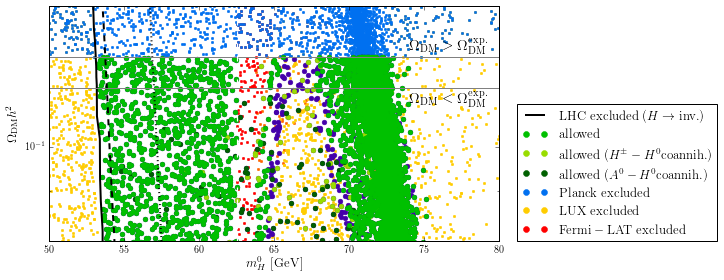

In [28]:
## to do, update LUX zoom

plt.semilogy(c0ID['MH0'],c0ID['Omega'],'y.',color='#ff6600', markersize=5,label= '')
plt.semilogy(cI0D['MH0'],cI0D['Omega'],'y.',color='#ffcc00', markersize=5,label= '')
plt.semilogy(cD0I['MH0'],cD0I['Omega'],'y.',color='#ff0000', markersize=5,label= '')
#
plt.semilogy(cIDh0ga['MH0'],cIDh0ga['Omega'],'y.',color='#aa0088',        markersize=5,label= '')

plt.semilogy(c0R['MH0'],c0R['Omega'],'y.', color='#0070f0', markersize=5,label= '')

#LUX15
plt.semilogy(cCcoIDh['MH0'],cCcoIDh['Omega'],'g.',color='#4400aa', markersize=9.5,label= '')
plt.semilogy(cAcoIDh['MH0'],cAcoIDh['Omega'],'g.',color='#4400aa', markersize=9.5,label= '')
plt.semilogy(c0coIDh['MH0'],c0coIDh['Omega'],'g.',color='#4400aa', markersize=9.5,label= '')

#LUX16
plt.semilogy(ncCcoIDh['MH0'],ncCcoIDh['Omega'],'g.',color='#99dd00', markersize=9.5,label= '')
plt.semilogy(ncAcoIDh['MH0'],ncAcoIDh['Omega'],'g.',color='#006000', markersize=9.5,label= '')
plt.semilogy(nc0coIDh['MH0'],nc0coIDh['Omega'],'g.',color='#00c000', markersize=9.5,label= '')

plt.semilogy(X,Y,'k-',lw=2,label=r'$ {\rm{LHC\ excluded }}\ (H\rightarrow {\rm inv.}) $')
plt.semilogy(Xlhc2b,Ylhc2b,'k--',lw=2)
plt.semilogy(Xilc,Yilc,'k:',lw=2)

plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#00c000', label= r'$ \rm{allowed} $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#99dd00', label= r'$ {\rm{allowed\ }} ({H^\pm}-{H^0}{\rm coannih.}) $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#006000', label= r'$ {\rm{allowed\ }} ({A^0}-{H^0}{\rm coannih.}) $', markersize=12)

plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#0070f0',\
             label= r'$ \rm{Planck\ excluded} $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#ffcc00',\
             label= r'$ \rm{LUX\ excluded}$', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#ff0000',\
             label= r' ${\rm Fermi-LAT\ excluded}$', markersize=12)

plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#ffffff',markersize=12,label= '')

plt.xlim(50,80)
plt.ylim(8E-2,1.4E-1)
plt.xlabel(r'$m_{H}^{0}$ [GeV]',size=13)
plt.ylabel(r'$\Omega_{\rm DM} h^{2}$',size=13)

plt.annotate('$\Omega_{\\rm DM}>\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=15, xy=(74, 0.125), xytext=(74, 0.125), color='black')
plt.annotate('$\Omega_{\\rm DM}<\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=15, xy=(74, 0.085), xytext=(74, 0.11), color='black')

plt.axhline(Omegadmmax, color = 'gray')
plt.axhline(Omegadmmin, color = 'gray') 
plt.legend(prop={'size':13},loc=(1.04,0))

plt.tight_layout(rect=(0,0,0.6,1))
    
figsize(12,4)
plt.axvline(MH0thresh,color = 'white',linewidth=1.2,linestyle='--') 

#plt.title('($|\lambda_L|>10^{-5}$), $<\sigma v>^{dSph} $',size=15)
#plt.savefig('OmegavsMH0_IDM_final_s16zoom.pdf')
print datetime.datetime.now()

2016-05-12 15:35:01.463665


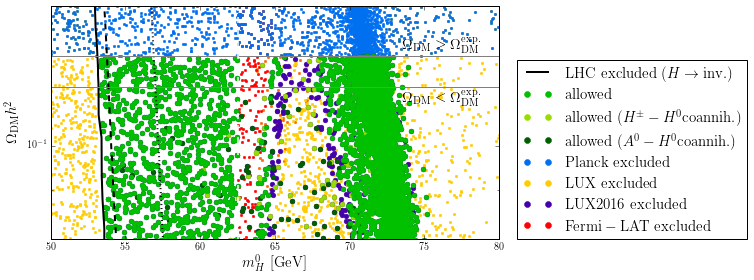

In [29]:
## to do, update LUX zoom

plt.semilogy(c0ID['MH0'],c0ID['Omega'],'y.',color='#ff6600', markersize=5,label= '')
plt.semilogy(cI0D['MH0'],cI0D['Omega'],'y.',color='#ffcc00', markersize=5,label= '')
plt.semilogy(cD0I['MH0'],cD0I['Omega'],'y.',color='#ff0000', markersize=5,label= '')
#
plt.semilogy(cIDh0ga['MH0'],cIDh0ga['Omega'],'y.',color='#aa0088',        markersize=5,label= '')

plt.semilogy(c0R['MH0'],c0R['Omega'],'y.', color='#0070f0', markersize=5,label= '')

#LUX15
plt.semilogy(cCcoIDh['MH0'],cCcoIDh['Omega'],'g.',color='#4400aa', markersize=9.5,label= '')
plt.semilogy(cAcoIDh['MH0'],cAcoIDh['Omega'],'g.',color='#4400aa', markersize=9.5,label= '')
plt.semilogy(c0coIDh['MH0'],c0coIDh['Omega'],'g.',color='#4400aa', markersize=9.5,label= '')

#LUX16
plt.semilogy(ncCcoIDh['MH0'],ncCcoIDh['Omega'],'g.',color='#99dd00', markersize=9.5,label= '')
plt.semilogy(ncAcoIDh['MH0'],ncAcoIDh['Omega'],'g.',color='#006000', markersize=9.5,label= '')
plt.semilogy(nc0coIDh['MH0'],nc0coIDh['Omega'],'g.',color='#00c000', markersize=9.5,label= '')

plt.semilogy(X,Y,'k-',lw=2,label=r'$ {\rm{LHC\ excluded }}\ (H\rightarrow {\rm inv.}) $')
plt.semilogy(Xlhc2b,Ylhc2b,'k--',lw=2)
plt.semilogy(Xilc,Yilc,'k:',lw=2)


plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#00c000', label= r'$ \rm{allowed} $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#99dd00', label= r'$ {\rm{allowed\ }} ({H^\pm}-{H^0}{\rm coannih.}) $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#006000', label= r'$ {\rm{allowed\ }} ({A^0}-{H^0}{\rm coannih.}) $', markersize=12)

plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#0070f0',\
             label= r'$ \rm{Planck\ excluded} $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#ffcc00',\
             label= r'$ \rm{LUX\ excluded}$', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#4400aa',\
             label= r'$ \rm{LUX2016\ excluded}$', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#ff0000',\
             label= r' ${\rm Fermi-LAT\ excluded}$', markersize=12)
#plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#aa0088',\
#             label= r' ${h\to \gamma\gamma\rm \ excluded}$', markersize=12)

plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#ffffff',markersize=12,label= '')

plt.xlim(50,80)
plt.ylim(8E-2,1.4E-1)
plt.xlabel(r'$m_{H}^{0}$ [GeV]',size=15)
plt.ylabel(r'$\Omega_{\rm DM} h^{2}$',size=15)

plt.annotate('$\Omega_{\\rm DM}>\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=15, xy=(73.5, 0.125), xytext=(73.5, 0.125), color='black')
plt.annotate('$\Omega_{\\rm DM}<\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=15, xy=(73.5, 0.085), xytext=(73.5, 0.11), color='black')

plt.axhline(Omegadmmax, color = 'gray')
plt.axhline(Omegadmmin, color = 'gray') 
plt.legend(prop={'size':15},loc=(1.04,0))

plt.tight_layout(rect=(0,0,0.6,1))
    
figsize(10,4)
plt.axvline(MH0thresh,color = 'white',linewidth=1.5,linestyle='--') 
#plt.axvline(67.5,color = 'black',linewidth=1.5,linestyle='-') 
#plt.axvline(66,color = 'black',linewidth=1.5,linestyle='-') 

#plt.title('($|\lambda_L|>10^{-5}$), $<\sigma v>^{dSph} $',size=15)
#plt.savefig('OmegavsMH0_IDM_final_s16zoomb.pdf')
print datetime.datetime.now()

2016-05-12 15:35:13.457779


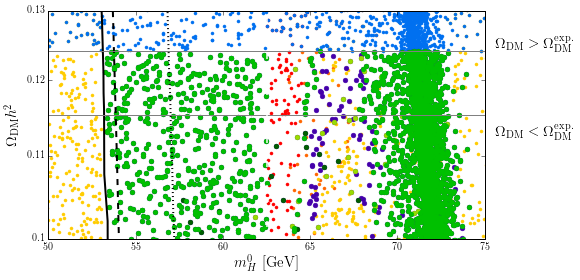

In [30]:
## to do, update LUX zoom
fig, ax = plt.subplots()

plt.semilogy(c0ID['MH0'],c0ID['Omega'],'y.',color='#ff6600', markersize=6,label= '')
plt.semilogy(cI0D['MH0'],cI0D['Omega'],'y.',color='#ffcc00', markersize=6,label= '')
plt.semilogy(cD0I['MH0'],cD0I['Omega'],'y.',color='#ff0000', markersize=6,label= '')
#
plt.semilogy(cIDh0ga['MH0'],cIDh0ga['Omega'],'y.',color='#aa0088',        markersize=5,label= '')

plt.semilogy(c0R['MH0'],c0R['Omega'],'y.', color='#0070f0', markersize=6,label= '')

#LUX15
plt.semilogy(cCcoIDh['MH0'],cCcoIDh['Omega'],'g.',color='#4400aa', markersize=9.5,label= '')
plt.semilogy(cAcoIDh['MH0'],cAcoIDh['Omega'],'g.',color='#4400aa', markersize=9.5,label= '')
plt.semilogy(c0coIDh['MH0'],c0coIDh['Omega'],'g.',color='#4400aa', markersize=9.5,label= '')

#LUX16
plt.semilogy(ncCcoIDh['MH0'],ncCcoIDh['Omega'],'g.',color='#99dd00', markersize=9.5,label= '')
plt.semilogy(ncAcoIDh['MH0'],ncAcoIDh['Omega'],'g.',color='#006000', markersize=9.5,label= '')
plt.semilogy(nc0coIDh['MH0'],nc0coIDh['Omega'],'g.',color='#00c000', markersize=9.5,label= '')

plt.semilogy(X,Y,'k-',lw=2,label=r'$ {\rm{LHC\ excluded }}\ (H\rightarrow {\rm inv.}) $')
plt.semilogy(Xlhc2b,Ylhc2b,'k--',lw=2)
plt.semilogy(Xilc,Yilc,'k:',lw=2)


plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#00c000', label= r'$ \rm{allowed} $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#99dd00', label= r'$ {\rm{allowed\ }} ({H^\pm}-{H^0}{\rm coannih.}) $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#006000', label= r'$ {\rm{allowed\ }} ({A^0}-{H^0}{\rm coannih.}) $', markersize=12)

plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#0070f0',\
             label= r'$ \rm{Planck\ excluded} $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#ffcc00',\
             label= r'$ \rm{LUX\ excluded}$', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#4400aa',\
             label= r'$ \rm{LUX2016\ excluded}$', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#ff0000',\
             label= r' ${\rm Fermi-LAT\ excluded}$', markersize=12)
#plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#aa0088',\
#             label= r' ${h\to \gamma\gamma\rm \ excluded}$', markersize=12)

plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#ffffff',markersize=12,label= '')

plt.xlim(50,75)
plt.ylim(1E-1,1.3E-1)
plt.xlabel(r'$m_{H}^{0}$ [GeV]',size=15)
plt.ylabel(r'$\Omega_{\rm DM} h^{2}$',size=15)

#plt.annotate('$\Omega_{\\rm DM}>\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=15, xy=(73.5, 0.125), xytext=(73.0, 0.124), color='black')
#plt.annotate('$\Omega_{\\rm DM}<\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=15, xy=(73.5, 0.108), xytext=(73.0, 0.112), color='black')
plt.annotate('$\Omega_{\\rm DM}>\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=15, xy=(68.5, 0.125), xytext=(75.6, 0.124), color='black')
plt.annotate('$\Omega_{\\rm DM}<\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=15, xy=(68.5, 0.108), xytext=(75.6, 0.112), color='black')

plt.axhline(Omegadmmax, color = 'gray')
plt.axhline(Omegadmmin, color = 'gray') 
#plt.legend(prop={'size':15},loc=(1.04,0))

#ax.set_xticks((-1.0,-0.5,0.0,0.5,1.0))
#ax.set_xticklabels(('$-1.0$','$-0.5$', '$0.0$','$0.5$','$1.0$'))
ax.set_yticks((0.1,0.11,0.12,0.13))
ax.set_yticklabels(('$0.1$','$0.11$', '$0.12$','$0.13$'))


plt.tight_layout(rect=(0,0,0.7,1))
    
figsize(8,3.)
plt.axvline(MH0thresh,color = 'white',linewidth=1.5,linestyle='--') 
#plt.axvline(67.5,color = 'black',linewidth=1.5,linestyle='-') 
#plt.axvline(66,color = 'black',linewidth=1.5,linestyle='-') 

#plt.title('($|\lambda_L|>10^{-5}$), $<\sigma v>^{dSph} $',size=15)
#plt.savefig('OmegavsMH0_IDM_final_s16zoome.pdf')
print datetime.datetime.now()

2016-05-12 15:35:48.163816


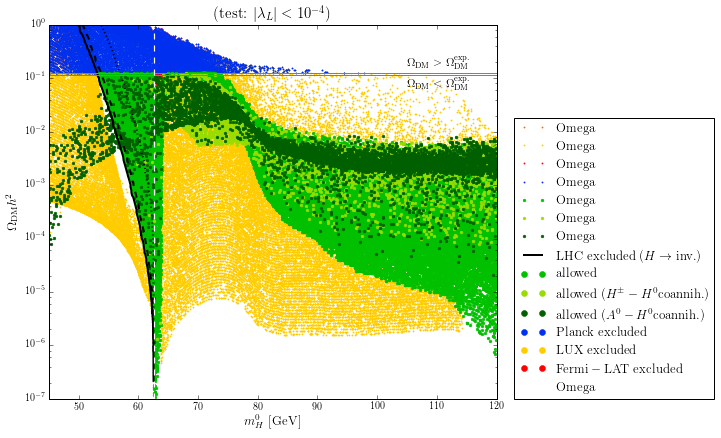

In [32]:
## test


plt.semilogy(c0ID['MH0'],c0ID['Omega'],'y.',color='#ff6600', markersize=2.5)
plt.semilogy(cI0D['MH0'],cI0D['Omega'],'y.',color='#ffcc00', markersize=2.5)
plt.semilogy(cD0I['MH0'],cD0I['Omega'],'y.',color='#ff0000', markersize=2.5)
#
plt.semilogy(c0R['MH0'],c0R['Omega'],'y.', color='#0030f0', markersize=2.5)

plt.semilogy(c0coIDh['MH0'],c0coIDh['Omega'],'g.',color='#00c000', markersize=5.5)
plt.semilogy(cCcoIDh['MH0'],cCcoIDh['Omega'],'g.',color='#99dd00', markersize=5.5)
plt.semilogy(cAcoIDh['MH0'],cAcoIDh['Omega'],'g.',color='#006000', markersize=5.5)
#plt.semilogy(c0coIDh['MH0'],c0coIDh['Omega'],'g.',color='#00c000', markersize=5.5)

plt.semilogy(X,Y,'k-',lw=2,label=r'$ {\rm{LHC\ excluded }}\ (H\rightarrow {\rm inv.}) $')
plt.semilogy(Xlhc2b,Ylhc2b,'k--',lw=2)
plt.semilogy(Xilc,Yilc,'k:',lw=2)


plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#00c000', label= r'$ \rm{allowed} $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#99dd00', label= r'$ {\rm{allowed\ }} ({H^\pm}-{H^0}{\rm coannih.}) $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#006000', label= r'$ {\rm{allowed\ }} ({A^0}-{H^0}{\rm coannih.}) $', markersize=12)

plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#0030f0',\
             label= r'$ \rm{Planck\ excluded} $', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#ffcc00',\
             label= r'$ \rm{LUX\ excluded}$', markersize=12)
plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'y.',color='#ff0000',\
             label= r' ${\rm Fermi-LAT\ excluded}$', markersize=12)

plt.semilogy(cdtmp['MH0'],cdtmp['Omega'],'g.',color='#ffffff',markersize=12)

plt.xlim(45,120)
plt.ylim(1E-7,1E0)
plt.xlabel(r'$m_{H}^{0}$ [GeV]',size=13)
plt.ylabel(r'$\Omega_{\rm DM} h^{2}$',size=13)

plt.annotate('$\Omega_{\\rm DM}>\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=12, xy=(85, 0.15), xytext=(105, 0.15), color='black')
plt.annotate('$\Omega_{\\rm DM}<\Omega_{\\rm DM}^{\\rm exp.}$',fontsize=12, xy=(85, 0.06), xytext=(105, 0.06), color='black')

plt.axhline(Omegadmmax, color = 'gray')
plt.axhline(Omegadmmin, color = 'gray') 
plt.legend(prop={'size':13},loc=(1.04,0))

plt.tight_layout(rect=(0,0,0.6,1))
    
figsize(12,6)
plt.axvline(MH0thresh,color = 'white',linewidth=1.2,linestyle='--') 

plt.title('(test: $|\lambda_L|<10^{-4}$) $',size=15)
#plt.savefig('OmegavsMH0_IDM_final_s8.pdf')
print datetime.datetime.now()